<a href="https://colab.research.google.com/github/PritishRane/Deep-Learning/blob/main/Handwritten_project_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

Read the handwriiten digit dataset

In [2]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

viewing first image from train data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

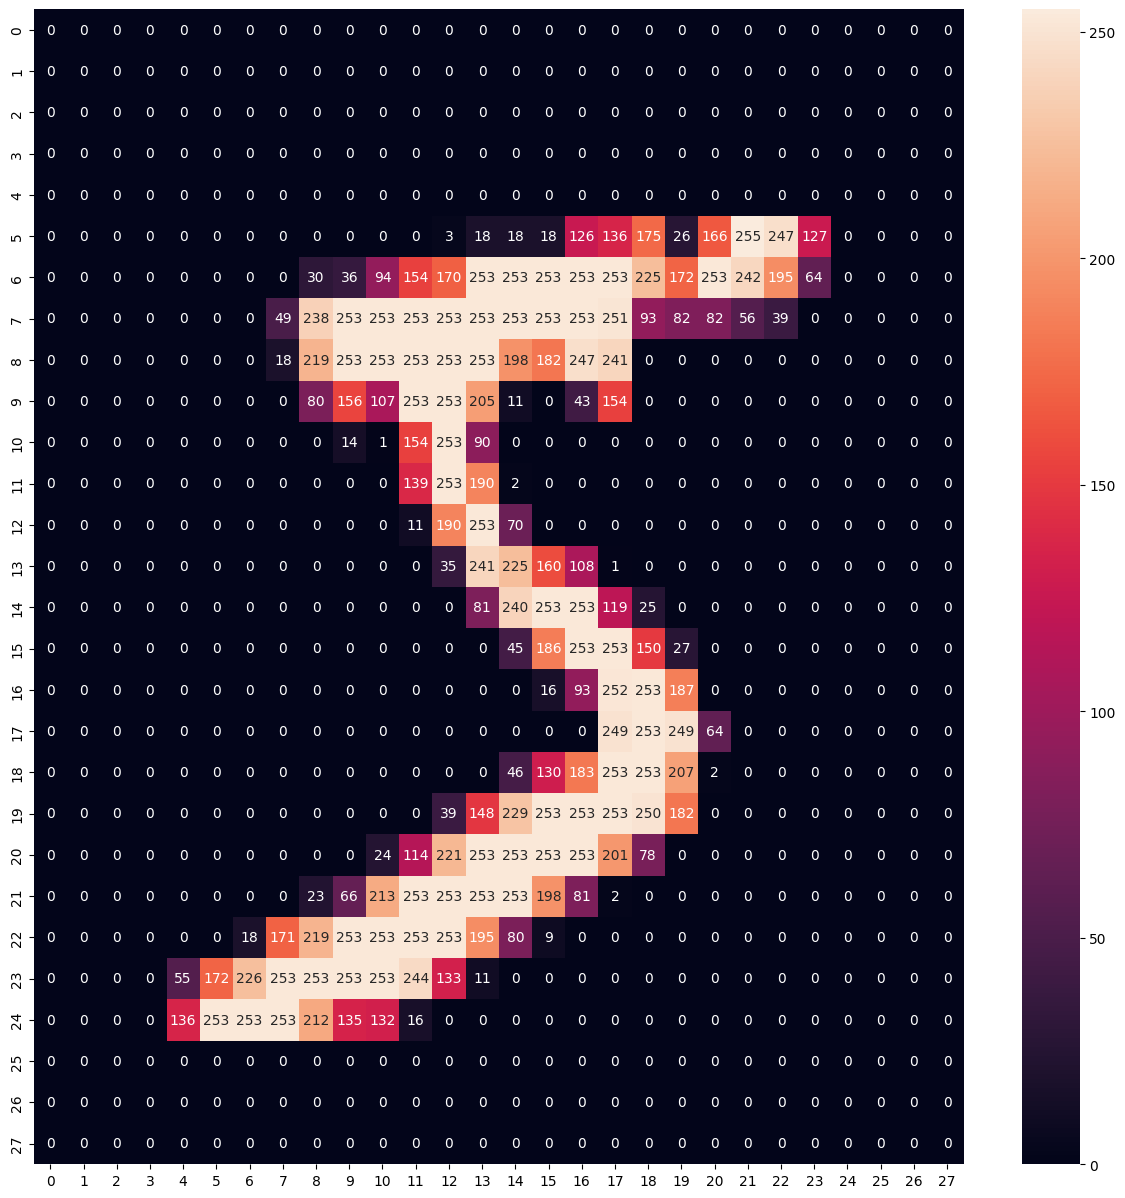

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

In [9]:
ytrain[0]

5

visulaizing top 9 images from xtrain data

In [10]:
for i in range (9):
  print(i)


0
1
2
3
4
5
6
7
8


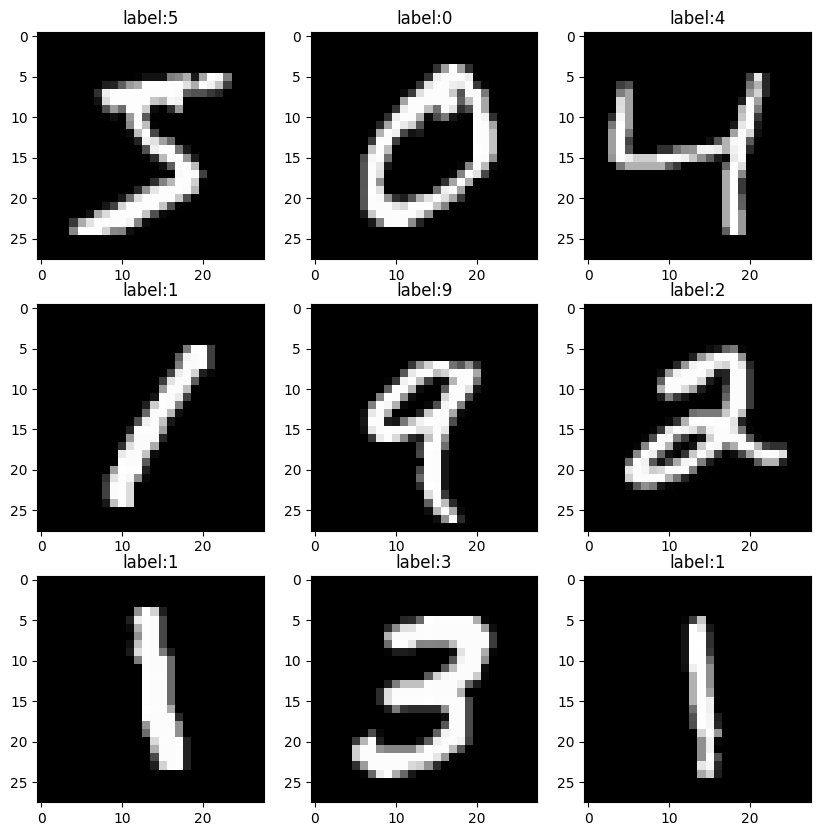

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'label:{ytrain[i]}')

preprocessing the data

In [12]:
# scale the x data divide by 255
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [13]:
import numpy as np
np.unique(ytrain)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
from keras.utils import to_categorical

In [15]:
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [16]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

create a simple covnet

In [22]:
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPool2D,Flatten,Dropout,Dense

In [23]:
model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))
# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))
# Add flatten layer
model.add(Flatten())
# Dropout layer
model.add(Dropout(rate=0.5))
# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Compile the model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the neural net

In [27]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 47s 28ms/step - loss: 0.2225 - accuracy: 0.9326 - val_loss: 0.0570 - val_accuracy: 0.9840
Epoch 2/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0852 - accuracy: 0.9735 - val_loss: 0.0452 - val_accuracy: 0.9868
Epoch 3/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0650 - accuracy: 0.9801 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 4/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.0338 - val_accuracy: 0.9897
Epoch 5/15
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0310 - val_accuracy: 0.9910
Epoch 6/15
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 7/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0328 -

Plot the learning curve for the model

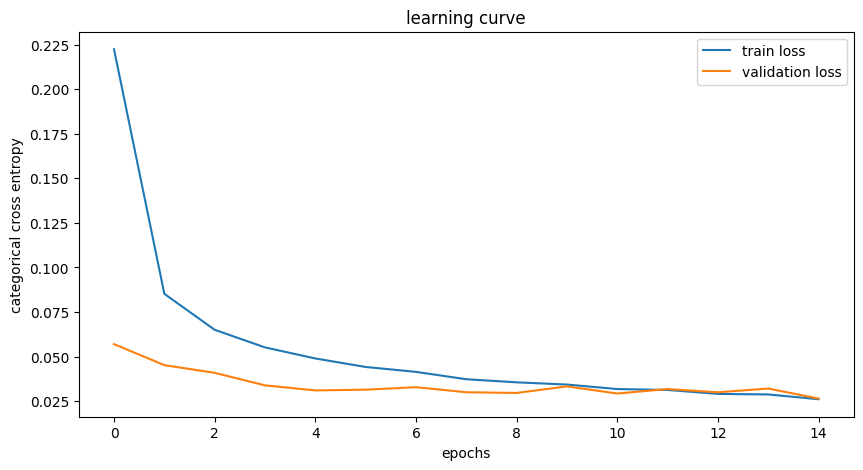

In [28]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy')
plt.title('learning curve')
plt.legend()
plt.show()

evaluating train and test model

In [29]:
model.evaluate(xtrain_scl,ytrain_cat)

1875/1875 [==============================] - 28s 15ms/step - loss: 0.0106 - accuracy: 0.9969


[0.01062360592186451, 0.9968833327293396]

In [30]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 3s 8ms/step - loss: 0.0240 - accuracy: 0.9919


[0.023981671780347824, 0.9919000267982483]

predict probability of train and test

In [32]:
yprob_train=model.predict(xtrain_scl)

1875/1875 [==============================] - 24s 13ms/step


In [33]:
yprob_test=model.predict(xtest_scl)

313/313 [==============================] - 3s 10ms/step


In [34]:
yprob_train[0:5]

array([[3.1519205e-13, 6.6580771e-15, 1.1962502e-12, 2.0255207e-05,
        1.5088296e-14, 9.9997967e-01, 4.4920621e-12, 9.7381851e-12,
        1.4309134e-08, 6.6309012e-09],
       [9.9999994e-01, 1.4648800e-18, 1.2669228e-08, 1.1443438e-13,
        2.9450750e-13, 2.0135035e-12, 8.3933891e-09, 1.4608760e-14,
        3.7169858e-09, 3.9029162e-09],
       [4.9451478e-16, 3.7612821e-08, 2.1195328e-11, 8.8675543e-12,
        9.9999970e-01, 1.3755329e-12, 1.2908930e-12, 2.3173337e-08,
        5.9029788e-11, 9.6651021e-08],
       [1.8928599e-08, 9.9994177e-01, 1.0156255e-06, 1.2741541e-10,
        3.4693338e-05, 1.7942673e-09, 1.1148523e-07, 1.6962391e-06,
        2.0576912e-05, 3.6475601e-08],
       [1.8739454e-10, 2.2260530e-10, 4.5281306e-10, 1.5773960e-08,
        3.3803060e-04, 4.1459782e-09, 4.6038260e-14, 1.1045646e-06,
        6.6786915e-06, 9.9965417e-01]], dtype=float32)

In [35]:
yprob_train[0]

array([3.1519205e-13, 6.6580771e-15, 1.1962502e-12, 2.0255207e-05,
       1.5088296e-14, 9.9997967e-01, 4.4920621e-12, 9.7381851e-12,
       1.4309134e-08, 6.6309012e-09], dtype=float32)

predictions for train and test

In [36]:
import numpy as np

In [37]:
ypred_train=np.argmax(yprob_train,axis=1)

In [38]:
ypred_test=np.argmax(yprob_test,axis=1)

In [39]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [41]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [43]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

plot confusion matrix

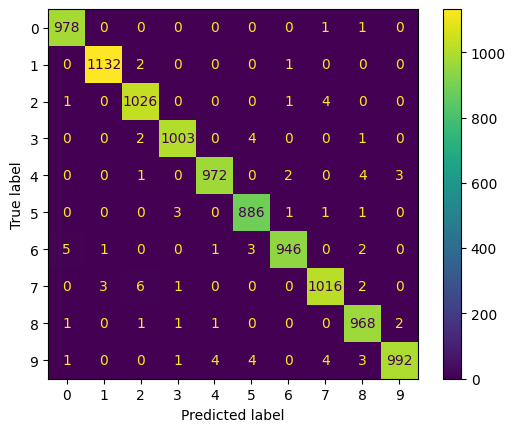

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

print classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Save keras model for future use

In [47]:
model.save('HandwrittenModel.keras')

Load above model

In [50]:
from keras.models import load_model
m=load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0